# Lecture 13 - Trees

## Classification Trees
Predicting Sales of Carseats is High or Not

In [2]:
library(ISLR)
library(tree)
attach(Carseats)

In [3]:
High=ifelse(Sales<=8,"No","Yes") #create categorial variable form continuous

In [4]:
Carseats=data.frame(Carseats,High) #merge it with data

tree.carseats = tree(High~.-Sales,Carseats) # predict high sales using all variables BUT sales
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

Training Error is 9%

For classification trees, deviance reported is

$$-2 \sum_m \sum_n n_{mk} \log \hat p_{mk}$$

A small deviance is a tree that fits the data well.

The residual mean deviance is the deviance divided by $n-|t_0|$, or 400-27 = 373 in this case.

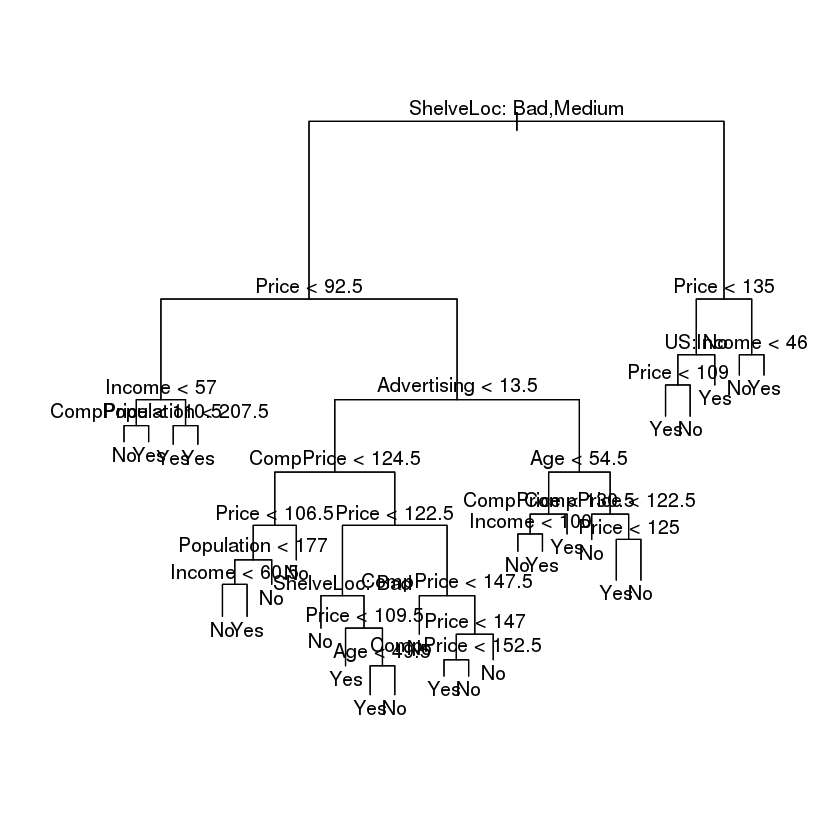

In [4]:
plot(tree.carseats)
text(tree.carseats,pretty=0)

The most important varaible appears to be shelving location, differentiating "Good" from "Bad" and "Medium"

We can also print out the split criterion, the number of observations per branch, the deviance, and the prediction.

In [5]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

## Evaluating Performance of a Tree

We split into a trainign and test set using predict()

In [6]:
set.seed(2)
train=sample(1:nrow(Carseats),200)
Carseats.test=Carseats[-train,]
High.test=High[-train]
tree.carseats = tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

The classification rate:

In [7]:
(86+57)/200

[1] 0.715

##  Pruning

The function cv.tree() performs cross-validation to find the optimal tree complexity (using cost-complexity pruning)

The argument FUN=prune.misclass indicates that we want to use the classification error to guide the pruning process rather than deviance 

cv.tree() reports the number of terminal nodes and the corresponding error rate.

In [8]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)

[1] "size"   "dev"    "k"      "method"

In [12]:
cv.carseats

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

dev corresponds to the cross-validation errorrate in this example.

The tree with 9 terminal nodes has the lowest cross-validation rate

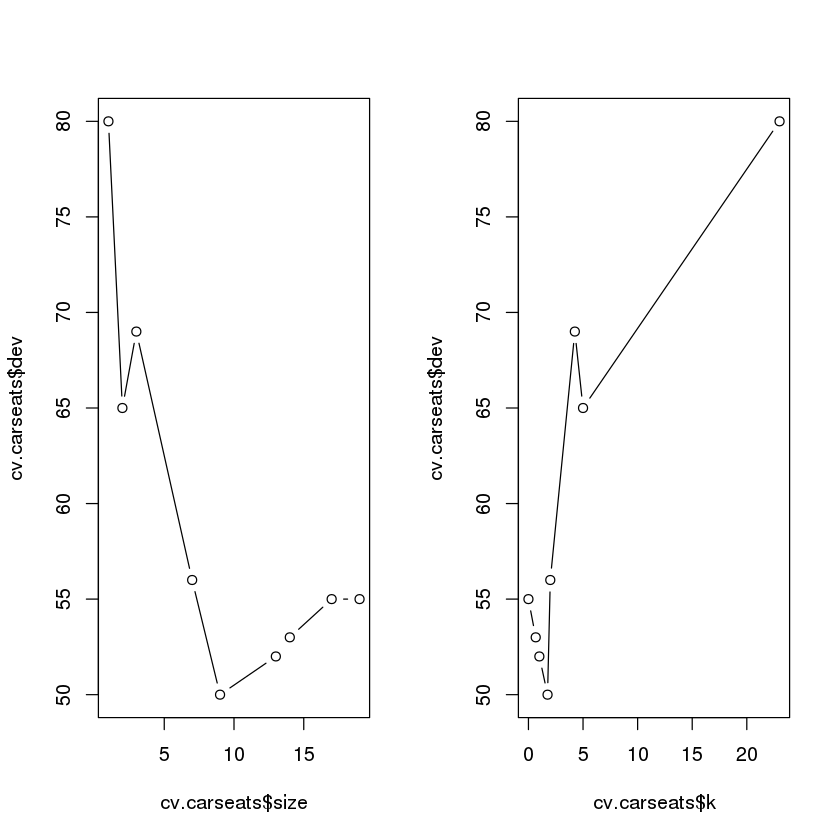

In [13]:
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")

We now prune to obtain the 9 node tree using prune.misclass()

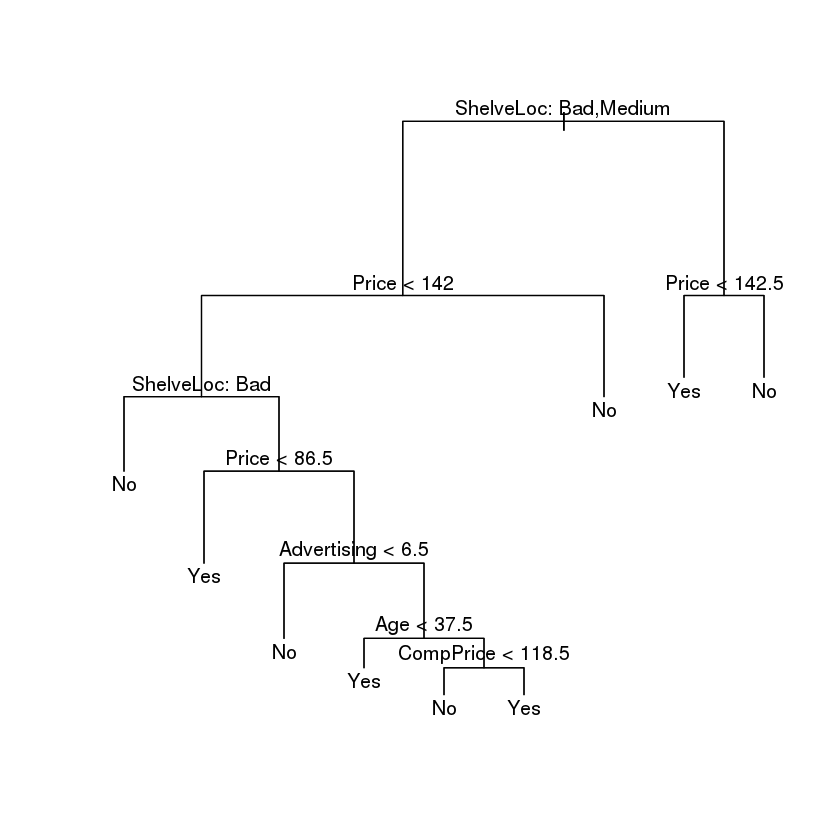

In [15]:
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

And can assess its performance on the test set

In [16]:
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

In [17]:
(94+60)/200

[1] 0.77

which is better than the 71% for the unpruned tree.

A larger tree will perform worse. We can check this by changing the best argument

         High.test
tree.pred No Yes
      No  86  22
      Yes 30  62

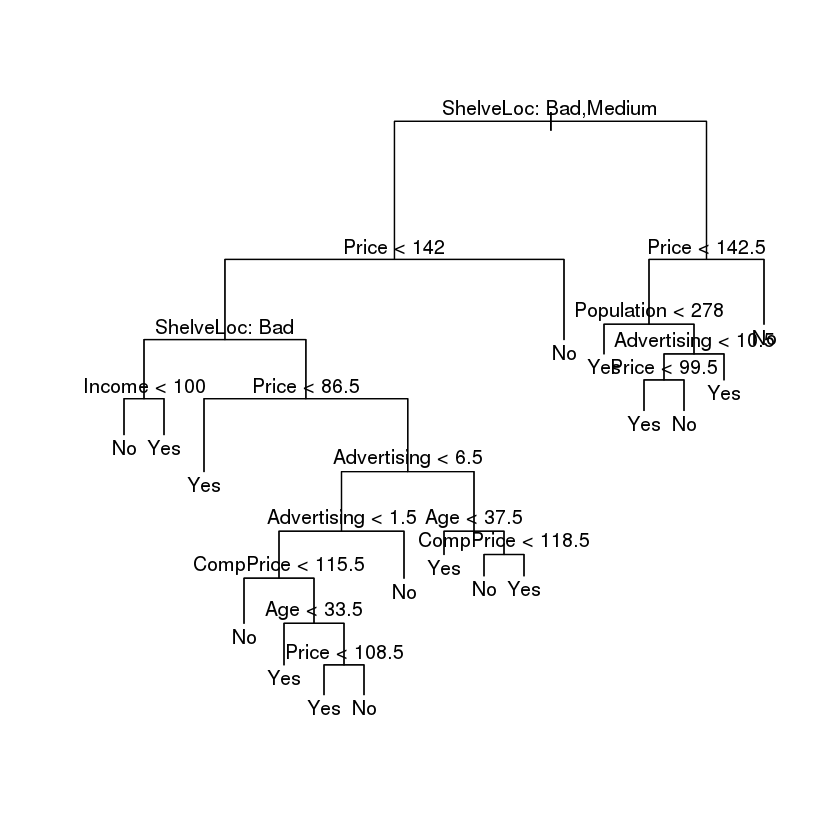

In [18]:
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

In [19]:
(86+62)/200

[1] 0.74

## Regression Trees

We use the Boston dataset to predict median house prices

In [20]:
library(MASS)
set.seed(1)
train=sample(1:nrow(Boston),nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

Only three variables have ben used in constructing the tree

lstat is the percentage of individuals with lower income status. Lower values of lstat predict higher valued homes

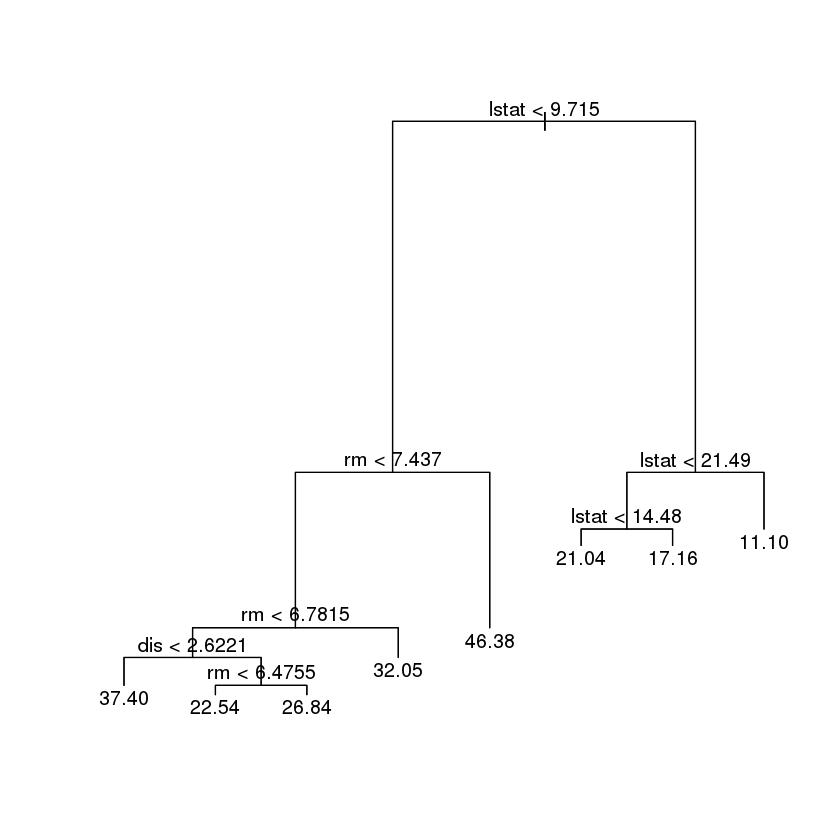

In [21]:
plot(tree.boston)
text(tree.boston,pretty=0)

Predicts median house price of $46,400 for larger homes (rm>= 7.437) and high socioeconomic status (lstat<9.715)

Now we assess pruning

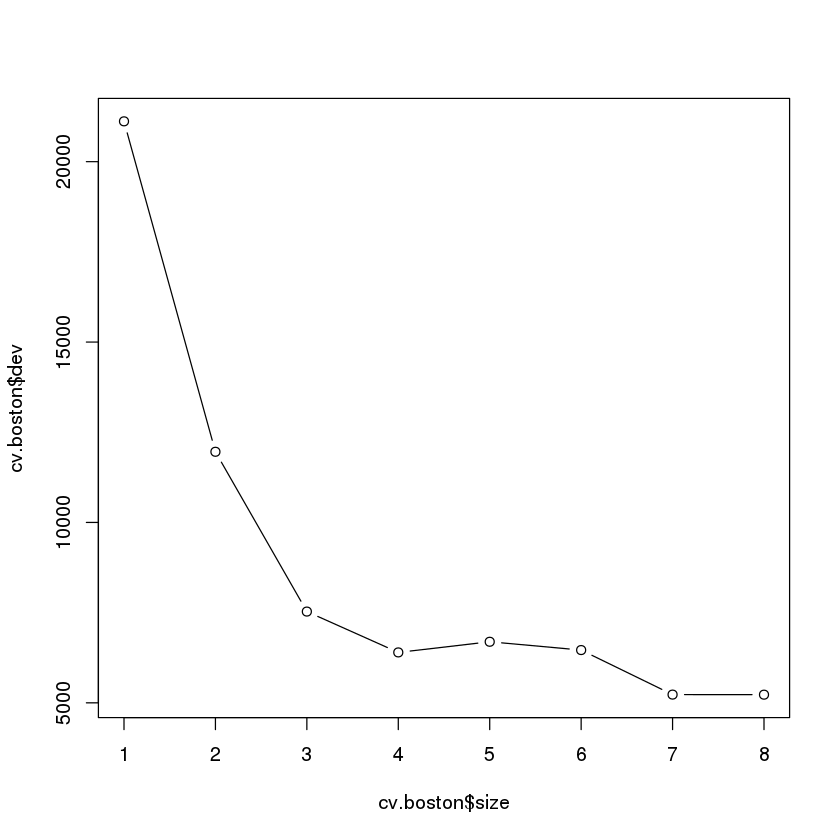

In [23]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type="b")

Here, the most complex tree is chosen.

[1] 25.04559

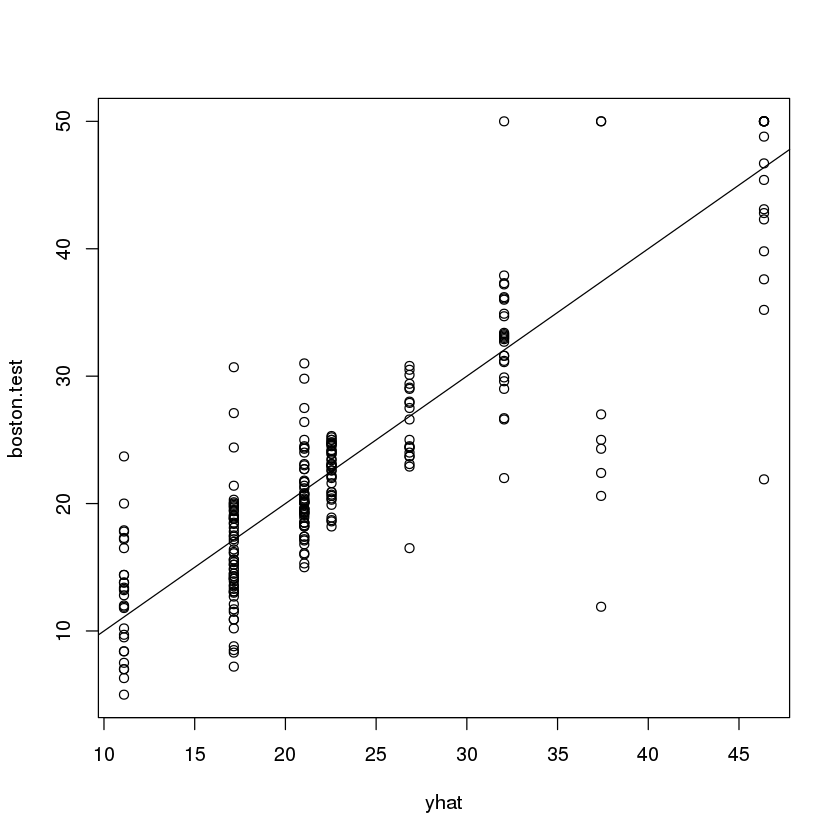

In [26]:
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)
mean((yhat-boston.test)^2) # the test MSE from the regression tree

If we take the square root of the MSE, the model leads to prediction which are within $\sqrt{25.05} = 5.005$ dollars of the median house price for that suburb.

## Bagging and Random Forests